## Modelo para o Sensor CEI

Este dataset **"DataCEI.csv"** possui informações dispostas em colunas sobre as características dos objetos que passam pelo sensor:

* **Tamanho**:  Segue a classificação do CEI2020 (Tamanho='0' - Grande 100%).
* **Referencia**:  Referência dinâmica do *Threshold.
* **NumAmostra**:  Número de amostras adquiridas.
* **Area**:  Somatório das Amplitudes das amostras.
* **Delta**:  Máxima Amplitude da amostra.
* **Output1**:  Peça tipo 1.
* **Output2**:  Peça tipo 2.



### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Vamos começar lendo o arquivo DataCEI.csv em um dataframe do pandas.

In [2]:
DataSet=pd.read_csv('arruela_.csv')

In [3]:
DataSet.head()

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,17:56:39,53,25,69,81,68,1,0
1,17:56:41,53,26,89,87,56,1,0
2,17:56:52,53,27,68,69,55,1,0
3,17:56:55,53,28,36,50,80,1,0
4,17:56:58,53,29,71,72,50,1,0


In [4]:
DataSet.drop(['Hora','Tamanho','Referencia'],axis=1,inplace=True)

In [5]:
DataSet.head()

,NumAmostra,Area,Delta,Output1,Output2
0,69,81,68,1,0
1,89,87,56,1,0
2,68,69,55,1,0
3,36,50,80,1,0
4,71,72,50,1,0


In [6]:
DataSet.describe()

,NumAmostra,Area,Delta,Output1,Output2
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,59.777778,63.697318,54.747126,0.375479,0.624521
std,17.293075,30.629366,35.548413,0.485177,0.485177
min,3.000000,6.000000,17.000000,0.000000,0.000000
25%,50.000000,46.000000,38.000000,0.000000,0.000000
50%,59.000000,56.000000,44.000000,0.000000,1.000000
75%,69.000000,68.000000,54.000000,1.000000,1.000000
max,120.000000,201.000000,251.000000,1.000000,1.000000


### Váriaveis do *Dataset*

In [7]:
DataSet.columns

Index(['NumAmostra', 'Area', 'Delta', 'Output1', 'Output2'], dtype='object')

### Número de Peças

#### Vamos classificar os grupos pelo número de peças: 
1. Grupo com uma peça
2. Grupo com duas peças

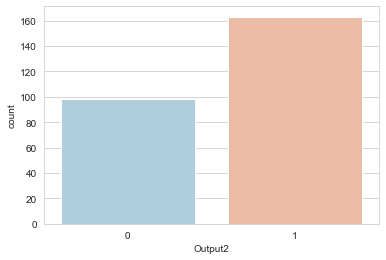

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

#### Gráfico da distribuição das áreas das peças

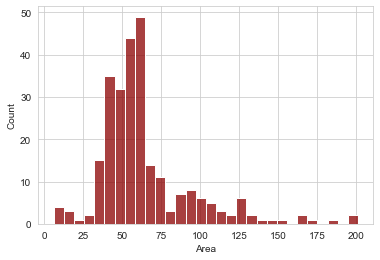

In [9]:
sns.histplot(DataSet['Area'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

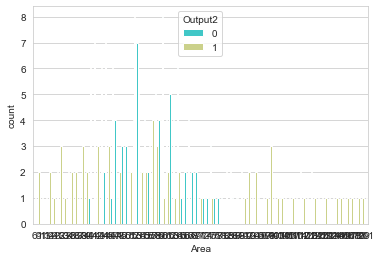

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

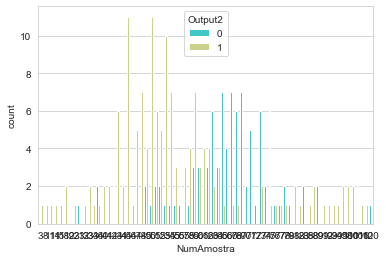

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

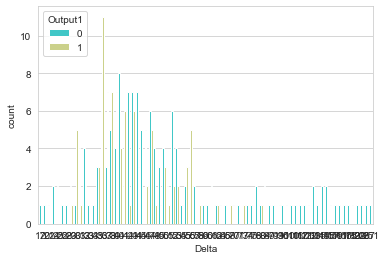

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Delta',hue='Output1',data=DataSet,palette='rainbow')
plt.show()

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino.

### Matrizes X e y

In [13]:
#X = DataSet[[ 'NumAmostra', 'Area', 'Delta']]
#y = DataSet[['Output1','Output2']]

### Relação entre as variáveis preditoras

####  Algumas questões importantes
1. Pelo menos um dos preditores ***x1, x2, ... ,x5***  é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar **y**, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

**Gráficos simples de dispersão**

Pelos gráficos abaixo percebemos ... nossa variável de resposta

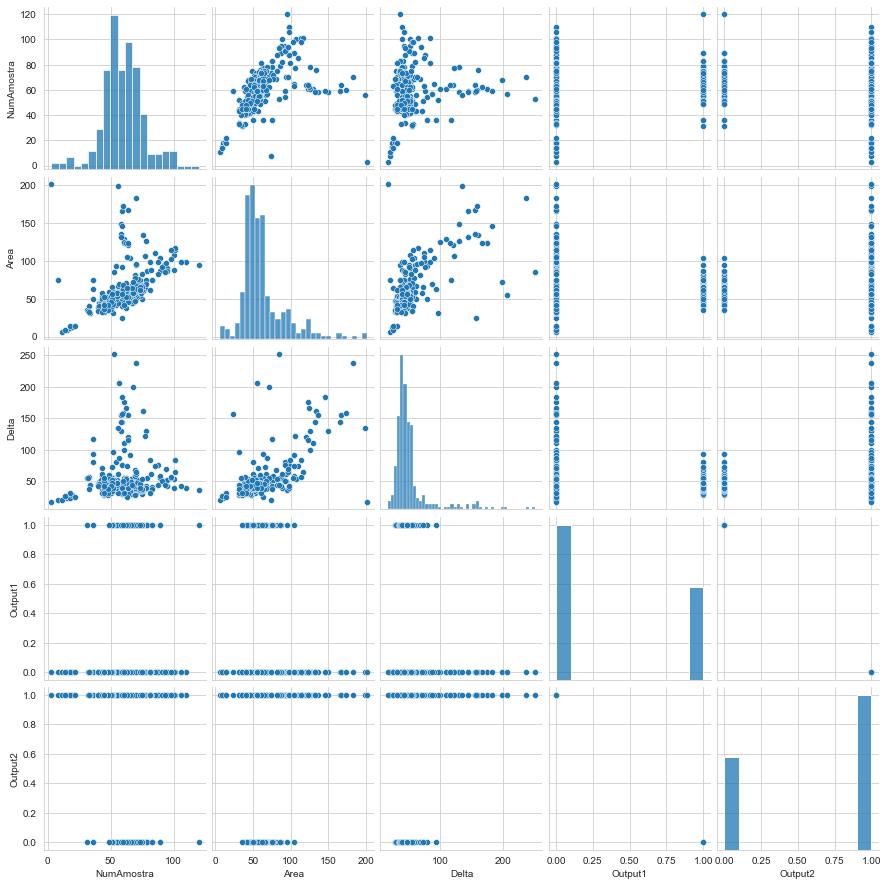

In [14]:
sns.pairplot(DataSet)
plt.show()

**Mapa de Calor**

O gráfico abaixo mostra através de uma escala de cores a correlação entre as variáveis do *Dataset*. Se observarmos as cores deste gráfico, a variável preditora **'Area'** possui maior correlação com a variável de resposta **'Output'** e a variável **'NumAmostra'** a menor.

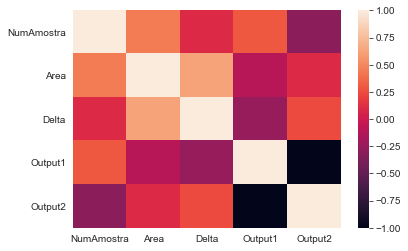

In [15]:
sns.heatmap(DataSet.corr())
plt.show()

## Normalização dos Dados

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
DataScaled=scaler.fit_transform(DataSet)
DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['NumAmostra', 'Area', 'Delta', 'Output1','Output2'])


In [17]:
DataSetScaled.head()

,NumAmostra,Area,Delta,Output1,Output2
0,0.534314,0.565990,0.373528,1.289676,-1.289676
1,1.693069,0.762257,0.035312,1.289676,-1.289676
2,0.476377,0.173457,0.007127,1.289676,-1.289676
3,-1.377630,-0.448055,0.711745,1.289676,-1.289676
4,0.650190,0.271590,-0.133796,1.289676,-1.289676


### Conjunto de dados para o treinamento

In [18]:
X = DataSetScaled.drop(['Output1', 'Output2'],axis=1)
y = DataSet[['Output1','Output2']]

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=101)

print(y_test)
print(X_test)

     Output1  Output2
89         1        0
212        0        1
218        0        1
96         1        0
88         1        0
..       ...      ...
131        0        1
46         1        0
82         1        0
151        0        1
101        0        1

[157 rows x 2 columns]
     NumAmostra      Area     Delta
89     0.476377 -0.186366 -0.331089
212   -0.856191 -1.036855 -0.725675
218    1.229567 -0.088232 -0.669306
96    -1.667319 -0.938722  0.007127
88    -0.103000 -0.415344 -0.472013
..          ...       ...       ...
131    2.040695  0.893102 -0.077427
46     0.766065 -0.088232 -0.528382
82    -0.624440 -0.480766 -0.218350
151    0.997816  1.383769  1.895502
101   -0.624440 -0.677033 -0.472013

[157 rows x 3 columns]


## Criando o Modelo de MPL

In [20]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 18
N_output = 2
learnrate = 0.1


## Inicialização dos pesos da MPL (Aleatório)

In [21]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
print('Pesos da Camada Oculta:')
print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[-0.0118946  -0.12746461 -0.05556184  0.0028082   0.02563875 -0.00415827
  -0.19747003 -0.01840267 -0.04183695  0.09020546 -0.1267918   0.27550724
   0.02141171 -0.06684248  0.06464398 -0.07133948 -0.08198354  0.13811586]
 [ 0.07111537 -0.05209387 -0.01863579  0.09521712 -0.02669235  0.13002625
   0.20869988  0.17407559 -0.03428309  0.13324591  0.12019204  0.00389952
  -0.15724998 -0.03034148 -0.10606397  0.10472789 -0.13493171 -0.01604883]
 [ 0.07141879  0.01079212  0.05684516 -0.064844    0.0805121  -0.0757758
   0.09469412 -0.08689664  0.13976883  0.11957466  0.11237305 -0.13605733
  -0.03701475 -0.03843859  0.02953967 -0.05570125 -0.00401456  0.0648652 ]]
Pesos da Camada de Saída:
[[ 0.19650664 -0.02640797]
 [ 0.22297762  0.08753392]
 [-0.19676141  0.03107259]
 [ 0.04100896 -0.02897676]
 [-0.20015352 -0.09046063]
 [ 0.03295819  0.00649247]
 [-0.06556706 -0.02741786]
 [-0.04769878  0.04834635]
 [ 0.08056038  0.00732889]
 [-0.01636286 -0.19201319]
 [-0.034480

## Algoritmo Backpropagation

In [22]:
epochs = 20000
last_loss=None
EvolucaoError=[]
IndiceError=[]

for e in range(epochs):
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print("Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)

Erro quadrático no treinamento:  0.2691040805593835
Erro quadrático no treinamento:  0.4024252817279955  Atenção: O erro está aumentando
Erro quadrático no treinamento:  0.33199731343214733
Erro quadrático no treinamento:  0.2585985277633953
Erro quadrático no treinamento:  0.20784328120920365
Erro quadrático no treinamento:  0.17056588573304934
Erro quadrático no treinamento:  0.13632174614031678
Erro quadrático no treinamento:  0.1058275250758842
Erro quadrático no treinamento:  0.08263273506087178
Erro quadrático no treinamento:  0.06607028344382665
Erro quadrático no treinamento:  0.054078552269742605
Erro quadrático no treinamento:  0.04516183380095458
Erro quadrático no treinamento:  0.038493244054078814
Erro quadrático no treinamento:  0.033481647197449144
Erro quadrático no treinamento:  0.029664854629788694
Erro quadrático no treinamento:  0.02670792202971066
Erro quadrático no treinamento:  0.02437635292827907
Erro quadrático no treinamento:  0.022505227184864154
Erro quadrát

In [23]:
### Gráfico da Evolução do Erro

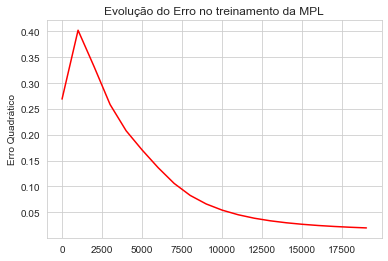

In [24]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

## Validação do modelo

In [25]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
MSE_Output1=0
MSE_Output2=0
predictions=0

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)

#-------------------------------------------    
    
#Cálculo do Erro da Predição
        ## TODO: Cálculo do Erro        
        if (output[0]>output[1]):
            if (yi[0]>yi[1]):
                predictions+=1
                
        if (output[1]>=output[0]):
            if (yi[1]>yi[0]):
                predictions+=1

print("A Acurácia da Predição é de: {:.3f}".format(predictions/n_records))
 

A Acurácia da Predição é de: 0.879
